<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Normal_vs_large_optic_cup_classification_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [109]:
# import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import cv2

## Accessing the main and sub directories with classes

In [ ]:
os.listdir('/content/drive/MyDrive/optic disc images')

['validation set', 'training set', 'testing set']

In [ ]:
os.listdir('/content/drive/MyDrive/optic disc images/validation set')

['normal discs', 'possibly glaucomatous']

In [ ]:
os.listdir('/content/drive/MyDrive/optic disc images/training set')

['normal discs', 'possibly glaucomatous']

In [ ]:
os.listdir('/content/drive/MyDrive/optic disc images/testing set')

['possibly glaucomatous', 'normal discs']

## Looking for image id in the normal discs subdirectory

In [146]:
# locating all the images in the normal disc subdirectory
normal_disc = glob.glob('/content/drive/MyDrive/optic disc images/training set/normal discs/*.JPG')
# finding the length of number of images in the Large optic cup subdirectory
print(len(normal_disc))
# showing id of first five Large optic cup images
normal_disc[:5]

38


['/content/drive/MyDrive/optic disc images/training set/normal discs/Label 21.JPG',
 '/content/drive/MyDrive/optic disc images/training set/normal discs/Label 14.JPG',
 '/content/drive/MyDrive/optic disc images/training set/normal discs/Label 7.JPG',
 '/content/drive/MyDrive/optic disc images/training set/normal discs/Label 32.JPG',
 '/content/drive/MyDrive/optic disc images/training set/normal discs/Label 28.JPG']

# Looking for image id in the possibly glaucomatous subdirectory

In [147]:
# locating all the images in the Normal optic cup subdirectory
possibly_glaucomatous = glob.glob('/content/drive/MyDrive/optic disc images/training set/possibly glaucomatous/*.JPG')
# finding the length of number of images in the Normal optic cup subdirectory
print(len(possibly_glaucomatous))
# showing id of first five Large optic cup images
possibly_glaucomatous[:5]

50


['/content/drive/MyDrive/optic disc images/training set/possibly glaucomatous/Large 25.JPG',
 '/content/drive/MyDrive/optic disc images/training set/possibly glaucomatous/Large 29.JPG',
 '/content/drive/MyDrive/optic disc images/training set/possibly glaucomatous/Large 19.JPG',
 '/content/drive/MyDrive/optic disc images/training set/possibly glaucomatous/Large 12.JPG',
 '/content/drive/MyDrive/optic disc images/training set/possibly glaucomatous/Large 43.JPG']

## Visualising images in the training set normal discs subdirectory

<ipython-input-148-9885e8b1b0c7>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


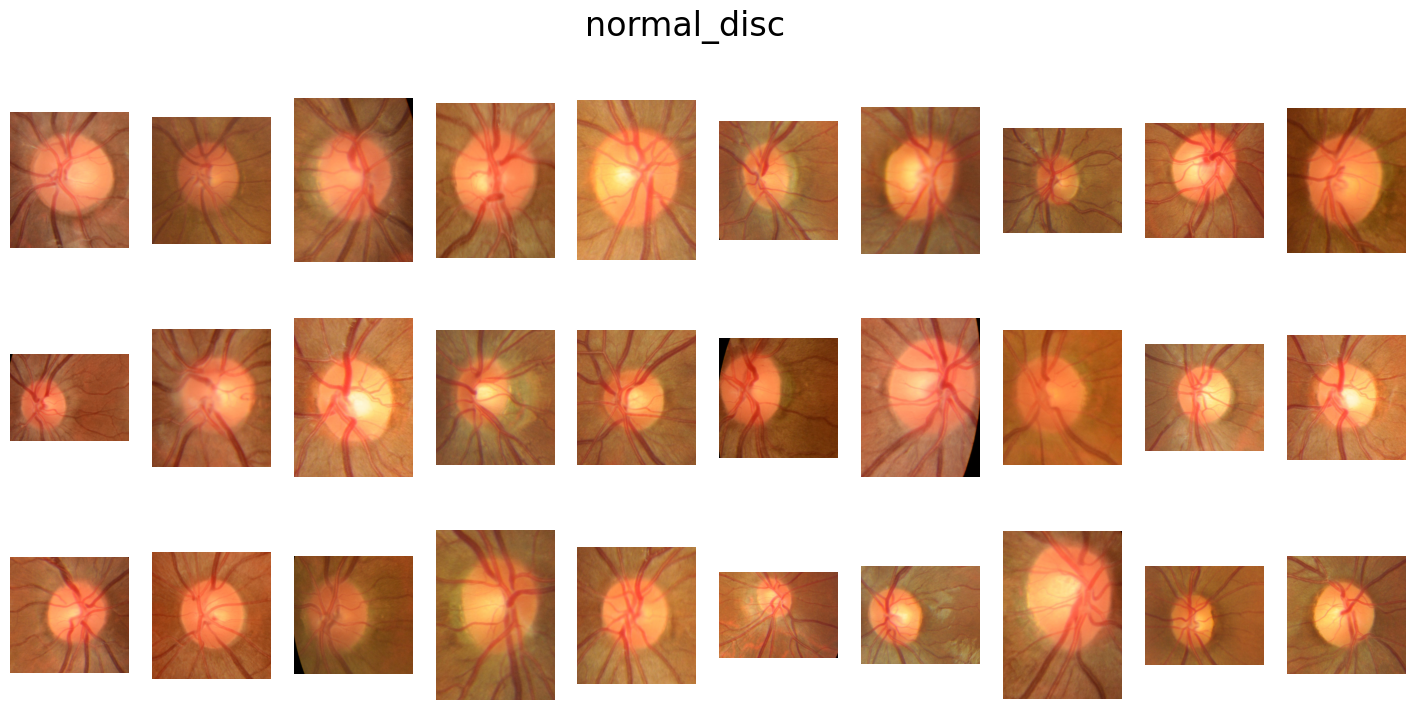

In [148]:
# IMAGES
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('normal_disc', fontsize=24)
for ind, img_src in enumerate(normal_disc[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

### Visualizing images in the training set possibly glaucomatous subdirectory

<ipython-input-149-b7713d6afe27>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


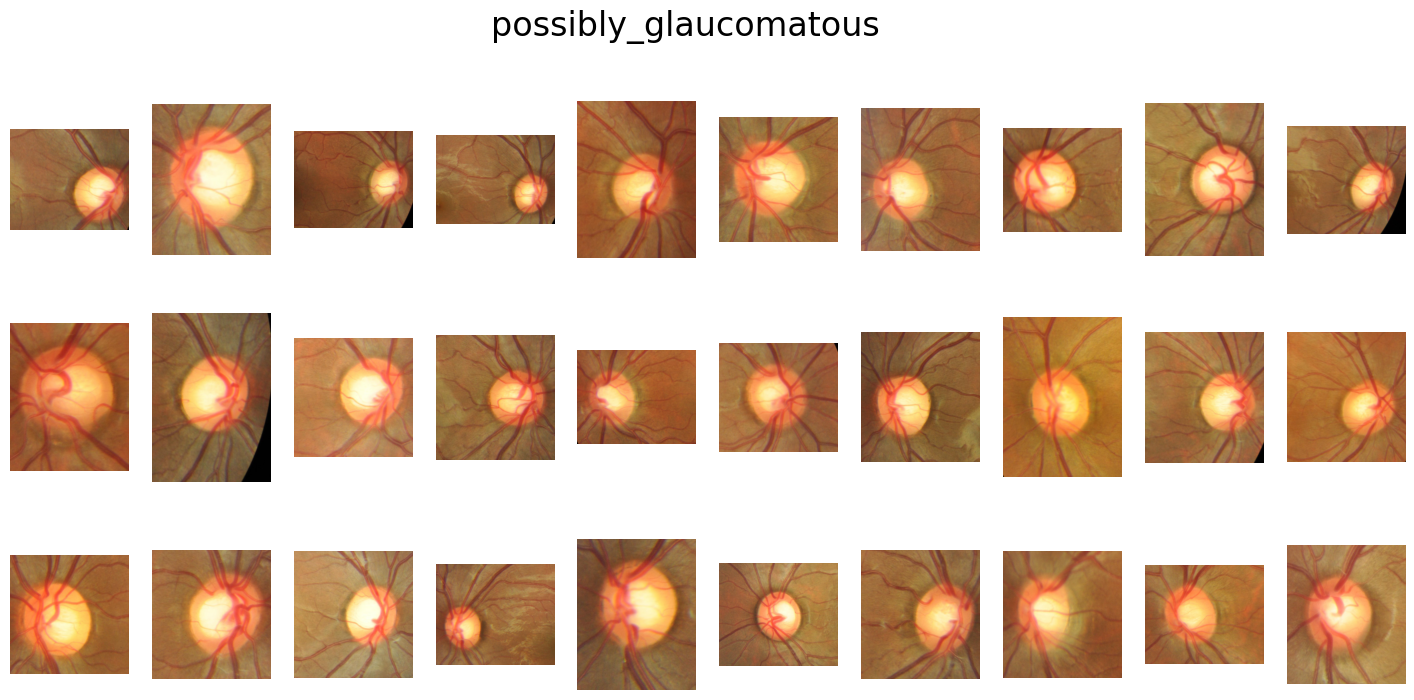

In [149]:
# IMAGES
fig,ax = plt.subplots(figsize=(18, 8))
fig.suptitle('possibly_glaucomatous', fontsize=24)
for ind, img_src in enumerate(possibly_glaucomatous[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

## Exploring the image dimensions in the subdirectories

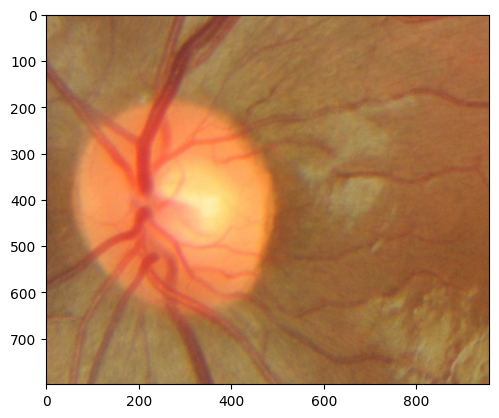

In [150]:
# Displaying normal disc image dimensions
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/optic disc images/training set/normal discs/Label 1.JPG')
plt.imshow(img)



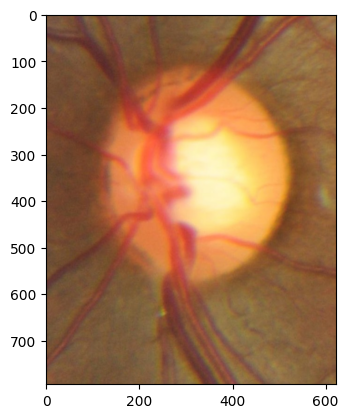

In [151]:
# Displaying possibly glaucomatous disc image dimensions
img = image.load_img('/content/drive/MyDrive/optic disc images/training set/possibly glaucomatous/Large 1.JPG')
plt.imshow(img)



In [152]:
img = cv2.imread('/content/drive/MyDrive/optic disc images/training set/normal discs/Label 1.JPG').shape
img




(799, 958, 3)

In [153]:
img = cv2.imread('/content/drive/MyDrive/optic disc images/training set/possibly glaucomatous/Large 1.JPG').shape
img



(794, 622, 3)

## Importing libraries for CNN model architecture design

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [128]:
# MODEL
# model parameters
# Number of training examples to process
BATCH_SIZE =5
# setting our training data images with 150 pixels width and 150 pixels height
IMG_SHAPE  = 150
TARGET_SIZE = 64
EPOCHS = 20

## Initializing coding and compiling the model

In [138]:
# Model initialization
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Looking at the model summary

In [154]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 17, 17, 128)      

## Fully connected network flowchart

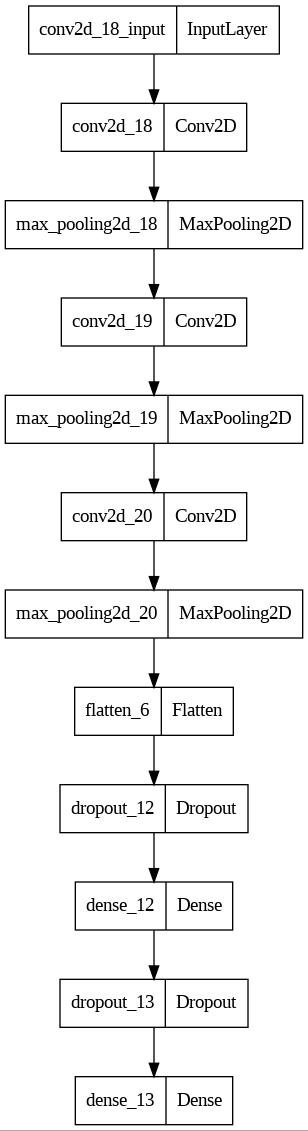

<Figure size 500x1000 with 0 Axes>

In [155]:
plt.figure(figsize=(5, 10))
plot_model(model, to_file="model.jpg")

## Image augmentation

In [130]:
# DATA GENERTOR

datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)
train_data = datagen.flow_from_directory('/content/drive/MyDrive/optic disc images/training set',
                             target_size=(150,150),
                             batch_size=BATCH_SIZE,
                             shuffle=True,
                             class_mode='binary',
                             subset='training')







test_data = datagen.flow_from_directory('/content/drive/MyDrive/optic disc images/testing set',
                             target_size=(150, 150),
                             batch_size=BATCH_SIZE,
                             shuffle=True,
                             class_mode='binary',
                             subset='validation')


Found 62 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


# Fitting the model

In [139]:
# MODEL FIT
history = model.fit(train_data,
                    validation_data= test_data,
                    epochs=EPOCHS,
                    verbose=1)


Epoch 1/20
13/13 [==============================] - 6s 342ms/step - loss: 0.8090 - accuracy: 0.4677 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/20
13/13 [==============================] - 6s 427ms/step - loss: 0.6898 - accuracy: 0.5484 - val_loss: 0.7035 - val_accuracy: 0.5000
Epoch 3/20
13/13 [==============================] - 5s 355ms/step - loss: 0.6862 - accuracy: 0.5645 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 4/20
13/13 [==============================] - 4s 313ms/step - loss: 0.6955 - accuracy: 0.5161 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 5/20
13/13 [==============================] - 6s 450ms/step - loss: 0.6932 - accuracy: 0.5323 - val_loss: 0.6766 - val_accuracy: 0.5833
Epoch 6/20
13/13 [==============================] - 4s 307ms/step - loss: 0.6688 - accuracy: 0.5645 - val_loss: 0.6316 - val_accuracy: 0.6667
Epoch 7/20
13/13 [==============================] - 5s 343ms/step - loss: 0.7411 - accuracy: 0.6129 - val_loss: 0.6809 - val_accuracy: 0.5000
Epoch 

## Plotting models metrics on the accuracy and accuracy loss, and validation accuracy and validation loss

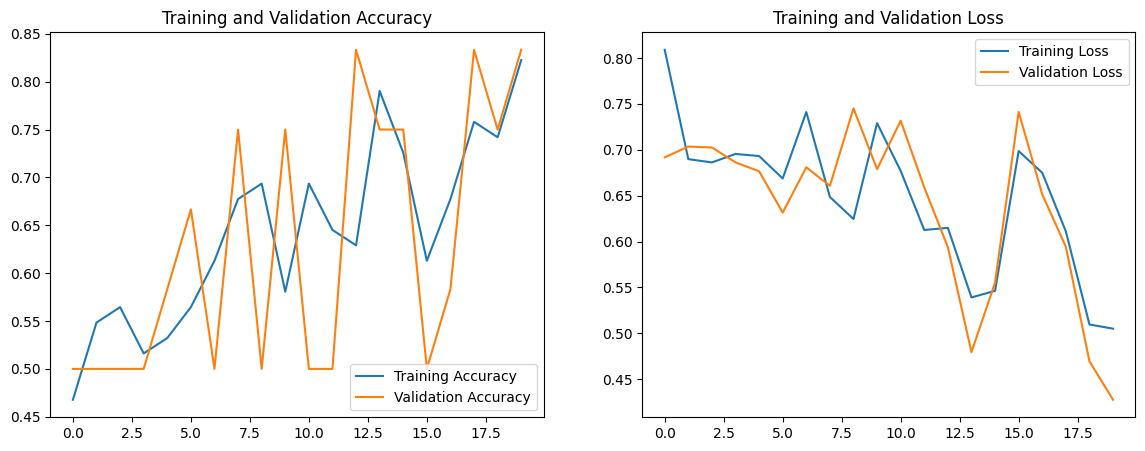

In [140]:
# PLOT METRICS
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## Prediction on test image

In [141]:
test_model = model.evaluate(test_data)
print('The testing accuracy is :',test_model[1]*100, '%')

3/3 [==============================] - 1s 147ms/step - loss: 0.5331 - accuracy: 0.7500
The testing accuracy is : 75.0 %


In [142]:
preds = model.predict(test_data,verbose=1)

3/3 [==============================] - 0s 71ms/step


In [143]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

## Plotting confusion matrix

<Axes: >

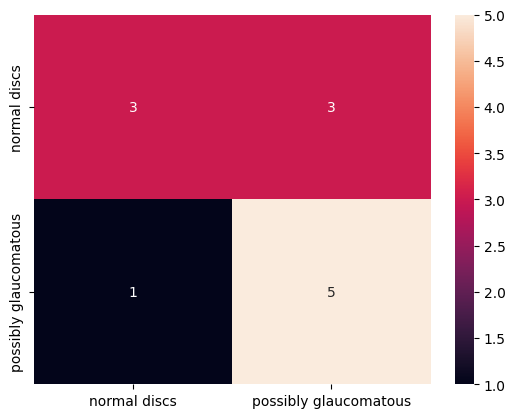

In [144]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
cm = pd.DataFrame(data=confusion_matrix(test_data.classes, predictions,labels=[0, 1]),index=["normal discs", "possibly glaucomatous"],
columns=["normal discs", "possibly glaucomatous"])
sns.heatmap(cm,annot=True,fmt="d")


In [145]:
print(classification_report(y_true=test_data.classes,y_pred=predictions,
                            target_names =['Normal discs','possibly glaucomatous']))




                       precision    recall  f1-score   support

         Normal discs       0.75      0.50      0.60         6
possibly glaucomatous       0.62      0.83      0.71         6

             accuracy                           0.67        12
            macro avg       0.69      0.67      0.66        12
         weighted avg       0.69      0.67      0.66        12



# thank you